<a href="https://colab.research.google.com/github/annalamboglia/Minicontest2/blob/main/Minicontest2_nuovo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_profiling as pp
from pandas_profiling import ProfileReport


In [ ]:
#Collegamento al Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Training.xlsx", 'rb') as fp:
    df = pd.read_excel(fp)

df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,NaN,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,NaN,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,rice straw,agricultural_waste,none,6.48,82.30,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,NaN,0.129942,1.128324,37.8,25.3,23.3,NaN,NaN,0.307387
173,sugarcane bagasse,agricultural_waste,none,16.07,79.59,NaN,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,NaN,0.494919
174,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,NaN,NaN,0.117263,0.953263,NaN,NaN,NaN,NaN,NaN,0.018292
175,white ash,forest residue,none,10.54,75.83,13.22,0.41,NaN,47.45,6.53,0.43,45.59,NaN,NaN,0.137619,0.960801,NaN,NaN,NaN,NaN,NaN,0.015102


In [ ]:
#Look at the data types whitch columns need to be encoded
df.dtypes

Material_1              object
Type_1                  object
Pretreatment_1          object
Moisture_1             float64
Volatiles_1            float64
Fixed Carbon_1         float64
Ash_1                  float64
HHV, MJ/Kg_1           float64
C_1                    float64
H_1                    float64
N_1                    float64
O_1                    float64
S_1                    float64
Cl_1                   float64
H/C(0)_1               float64
O/C(0)_1               float64
Cellulose_1            float64
Hemicellulose_1        float64
Lignin_1               float64
Extractives_1          float64
Particle Size, mm_1     object
O/C oil                float64
dtype: object

In [ ]:
df.shape

(177, 22)

#Boxplot

In [ ]:
import plotly.graph_objects as go

def boxplot(column):
  fig = go.Figure()
  fig.add_trace(go.Box(
      y=df[column],
      name=column,
      jitter=0.3,
      pointpos=-1.8,
      boxpoints='all', # represent all points
      marker_color='rgb(7,40,89)',
      line_color='rgb(7,40,89)'
  ))

  fig.update_layout(title_text=str(column))
  fig.show()

In [ ]:
for column in df.columns:
  boxplot(column)

#Considerazioni sui dati

In [ ]:
filtered_df = df[df['O/C oil']>=3]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
9,sugarcane bagasse,agricultural_waste,none,16.07,65.00,14.59,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,<0.50 mm,4.458494
59,coconut shell,agricultural_waste,none,11.26,68.18,17.18,3.38,22.83,63.45,6.73,0.43,28.27,0.17,0.95,0.106068,0.445548,NaN,NaN,NaN,NaN,<0.50 mm,4.200194


Vedo che ci sono dei pure che possono essere aggiustati

In [ ]:
filtered_df = df[df['Hemicellulose_1']==100]
filtered_df_2 = df[df['Cellulose_1']==100]
filtered_df_3 = df[df['Lignin_1']==100]
filtered_df_4 = df[df['Extractives_1']==100]

In [ ]:
vertical_concat = pd.concat([filtered_df, filtered_df_2,filtered_df_3,filtered_df_4], axis = 0)
vertical_concat

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
162,xylan,pure,none,6.51,76.16,12.31,5.02,NaN,40.25,5.76,0.32,53.62,0.05,NaN,0.143106,1.332174,NaN,100.0,NaN,NaN,NaN,0.105183
52,cellulose,pure,none,7.03,87.45,4.67,0.85,14.48,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.669970
89,cellulose,pure,none,7.03,87.45,4.67,0.85,NaN,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.836571
121,cellulose,pure,none,6.59,88.85,4.35,0.21,NaN,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731
122,cellulose,pure,none,6.59,88.85,4.35,0.21,17.32,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731
132,lignin,pure,none,6.87,67.10,23.09,2.94,NaN,58.70,5.45,0.37,35.43,0.05,NaN,0.092845,0.603578,NaN,NaN,100.0,NaN,NaN,0.423023


In [ ]:
filtered_df = df[df['Type_1']=='pure']
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
52,cellulose,pure,none,7.03,87.45,4.67,0.85,14.48,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.669970
89,cellulose,pure,none,7.03,87.45,4.67,0.85,NaN,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.836571
121,cellulose,pure,none,6.59,88.85,4.35,0.21,NaN,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731
122,cellulose,pure,none,6.59,88.85,4.35,0.21,17.32,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731
132,lignin,pure,none,6.87,67.10,23.09,2.94,NaN,58.70,5.45,0.37,35.43,0.05,NaN,0.092845,0.603578,NaN,NaN,100.0,NaN,NaN,0.423023
162,xylan,pure,none,6.51,76.16,12.31,5.02,NaN,40.25,5.76,0.32,53.62,0.05,NaN,0.143106,1.332174,NaN,100.0,NaN,NaN,NaN,0.105183


Ci sono infatti cellulose con type NaN ma posono essere aggiustate

In [ ]:
filtered_df = df[df['Type_1'].isna()]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
5,mallee,NaN,none,NaN,81.90,17.60,0.50,NaN,48.40,6.30,0.10,45.20,NaN,NaN,0.130165,0.933884,NaN,NaN,NaN,NaN,"0,09÷0,6",0.777290
30,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.911579
35,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.910230
43,camelina straw pellets,NaN,none,7.60,83.85,6.10,2.45,16.85,43.10,5.65,0.25,50.95,0.05,NaN,0.131090,1.182135,NaN,NaN,NaN,NaN,"0,25÷0,50",0.907258
55,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.972705
90,wheat straw,NaN,none,5.45,80.85,9.15,4.55,16.55,42.30,5.50,0.70,51.35,0.15,NaN,0.130024,1.213948,NaN,NaN,NaN,NaN,"0,25÷0,50",0.673042
101,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.917411
105,sweet gum,NaN,none,11.31,75.79,12.42,0.71,17.10,47.88,5.57,0.08,34.65,0.03,NaN,0.116332,0.723684,NaN,NaN,25.9,NaN,2÷6,1.116972


In [ ]:
#LA RIGA 121 e 122 è UN DUPLICATO
#La riga 52 e 89 sono uguali tranne un NaN e danno 2 valori differenti

Vedo Particle Size, mm_1 per capire se tenerlo o no

In [ ]:
filtered_df = df[df['Particle Size, mm_1'].isna()]

In [ ]:
df1=df.drop(filtered_df.index,axis=0)

df1

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,NaN,0.124733,1.002559,41.00,26.50,25.30,NaN,0.6,2.561132
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,NaN,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824
5,mallee,NaN,none,NaN,81.90,17.60,0.50,NaN,48.40,6.30,0.10,45.20,NaN,NaN,0.130165,0.933884,NaN,NaN,NaN,NaN,"0,09÷0,6",0.777290
6,beech wood,hardwood,none,NaN,NaN,NaN,2.80,18.20,46.30,6.30,0.10,36.10,NaN,NaN,0.136069,0.779698,NaN,NaN,NaN,NaN,2÷3,0.460692
9,sugarcane bagasse,agricultural_waste,none,16.07,65.00,14.59,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,<0.50 mm,4.458494
10,beech wood,hardwood,none,6.00,85.30,14.30,0.40,NaN,50.80,5.90,0.30,42.90,0.02,NaN,0.116142,0.844488,NaN,NaN,NaN,NaN,10,0.519105
20,pine wood,softwood,none,7.64,77.86,14.16,0.34,17.64,46.55,6.47,NaN,46.98,NaN,NaN,0.138990,1.009237,45.33,28.38,28.34,2.36,1,0.525429
22,wheat straw,agricultural_waste,none,2.00,80.50,10.60,6.90,NaN,44.40,5.60,5.40,44.60,NaN,NaN,0.126126,1.004505,44.80,33.00,13.80,1.40,"0,18-0,28",1.217918
27,poplar,hardwood,none,7.00,NaN,NaN,5.50,18.50,45.80,5.90,1.40,41.50,NaN,NaN,0.128821,0.906114,NaN,NaN,32.10,21.00,0.3,2.561265
28,pine wood,softwood,none,7.52,84.76,14.96,0.33,18.29,47.10,5.90,0.04,46.40,0.06,NaN,0.125265,0.985138,NaN,NaN,NaN,NaN,1÷2,0.567388


#Modifico i dati a mano

In [ ]:
df.loc[[121]]

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
121,cellulose,pure,none,6.59,88.85,4.35,0.21,NaN,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731


In [ ]:
df.loc[[122]]

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
122,cellulose,pure,none,6.59,88.85,4.35,0.21,17.32,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731


In [ ]:
#Riga duplicato ha solo 1 valore che prima era nan e poi messo
df=df.drop(121)


In [ ]:
#Ho due righe uguali con valori differenti
#df=df.drop(89)

In [ ]:
df.shape[0]

176

Aggiusto i dati pure

In [ ]:
filtered_df = df[df['Type_1'].isna()]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
5,mallee,NaN,none,NaN,81.90,17.60,0.50,NaN,48.40,6.30,0.10,45.20,NaN,NaN,0.130165,0.933884,NaN,NaN,NaN,NaN,"0,09÷0,6",0.777290
30,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.911579
35,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.910230
43,camelina straw pellets,NaN,none,7.60,83.85,6.10,2.45,16.85,43.10,5.65,0.25,50.95,0.05,NaN,0.131090,1.182135,NaN,NaN,NaN,NaN,"0,25÷0,50",0.907258
55,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.972705
90,wheat straw,NaN,none,5.45,80.85,9.15,4.55,16.55,42.30,5.50,0.70,51.35,0.15,NaN,0.130024,1.213948,NaN,NaN,NaN,NaN,"0,25÷0,50",0.673042
101,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.917411
105,sweet gum,NaN,none,11.31,75.79,12.42,0.71,17.10,47.88,5.57,0.08,34.65,0.03,NaN,0.116332,0.723684,NaN,NaN,25.9,NaN,2÷6,1.116972


In [ ]:
for i in df.index:
  if df['Material_1'][i]=='cellulose':
    df['Type_1'][i]='pure'
    df['Cellulose_1'][i]=100.0
    df['Hemicellulose_1'][i]=0.0
    df['Lignin_1'][i]=0.0
    df['Extractives_1'][i]=0.0

  elif df['Material_1'][i]=='lignin':
    df['Type_1'][i]='pure'
    df['Cellulose_1'][i]=0.0
    df['Hemicellulose_1'][i]=0.0
    df['Lignin_1'][i]=100.0
    df['Extractives_1'][i]=0.0

  elif df['Material_1'][i]=='lignin':
    df['Type_1'][i]='pure'
    df['Cellulose_1'][i]=0.0
    df['Hemicellulose_1'][i]=0.0
    df['Lignin_1'][i]=100.0
    df['Extractives_1'][i]=0.0

  elif df['Material_1'][i]=='xylan':
    df['Type_1'][i]='pure'
    df['Cellulose_1'][i]=0.0
    df['Hemicellulose_1'][i]=100.0
    df['Lignin_1'][i]=0.0
    df['Extractives_1'][i]=0.0


Vedo anche le altre categorie

In [ ]:
filtered_df = df[df['Fixed Carbon_1'].isna()]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315
6,beech wood,hardwood,none,NaN,NaN,NaN,2.80,18.20,46.30,6.30,0.10,36.10,NaN,NaN,0.136069,0.779698,NaN,NaN,NaN,NaN,2÷3,0.460692
7,olive husk,industrial waste,none,3.66,NaN,NaN,1.88,21.57,51.80,6.83,1.32,40.05,NaN,NaN,0.131853,0.773166,NaN,NaN,NaN,NaN,NaN,0.491506
12,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.446596
13,poplar,hardwood,none,6.20,NaN,NaN,3.40,18.80,46.60,6.00,0.60,43.50,NaN,NaN,0.128755,0.933476,49.50,NaN,26.80,16.70,NaN,1.601695
16,pine wood,softwood,none,NaN,NaN,NaN,0.20,NaN,50.40,6.40,0.70,42.50,NaN,NaN,0.126984,0.843254,NaN,NaN,NaN,NaN,NaN,0.679702
21,pine wood,softwood,none,NaN,NaN,NaN,0.20,NaN,50.40,6.40,0.70,42.50,NaN,NaN,0.126984,0.843254,NaN,NaN,NaN,NaN,NaN,0.713208
23,poplar,hardwood,none,4.30,NaN,NaN,0.70,18.80,46.70,6.20,0.20,46.50,NaN,NaN,0.132762,0.995717,63.10,NaN,25.30,5.20,NaN,1.387013


Prendo le altre e faccio la differenza

In [ ]:
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
for i in df.index:
  if np.isnan(df['Moisture_1'][i]) and df['Volatiles_1'][i]!='nan' and df['Fixed Carbon_1'][i]!='nan' and df['Ash_1'][i]!='nan':
    df['Moisture_1'][i]=100-(df['Volatiles_1'][i]+df['Fixed Carbon_1'][i]+df['Ash_1'][i])
 
  elif np.isnan(df['Volatiles_1'][i]) and  df['Fixed Carbon_1'][i]!='nan' and df['Ash_1'][i]!='nan' and df['Moisture_1'][i]!='nan':
    df['Volatiles_1'][i]=100-(df['Moisture_1'][i]+df['Fixed Carbon_1'][i]+df['Ash_1'][i])
  
  elif np.isnan(df['Fixed Carbon_1'][i]) and  df['Volatiles_1'][i]!='nan' and df['Ash_1'][i]!='nan'and df['Moisture_1'][i]!='nan':
    df['Fixed Carbon_1'][i]=100-(df['Moisture_1'][i]+df['Volatiles_1'][i]+df['Ash_1'][i])
  
  elif np.isnan(df['Ash_1'][i]) and  df['Fixed Carbon_1'][i]!='nan' and df['Volatiles_1'][i]!='nan'and df['Moisture_1'][i]!='nan':
    df['Ash_1'][i]=100-(df['Moisture_1'][i]+df['Fixed Carbon_1'][i]+df['Volatiles_1'][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
for i in df.index:
  if np.isnan(df['C_1'][i]) and df['H_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['C_1'][i]=100-(df['H_1'][i]+df['N_1'][i]+df['O_1'][i]+df['S_1'][i]+df['Cl_1'][i])
 
  elif np.isnan(df['H_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['H_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['O_1'][i]+df['S_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['N_1'][i]) and df['C_1'][i]!='nan' and df['H_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['N_1'][i]=100-(df['C_1'][i]+df['H_1'][i]+df['O_1'][i]+df['S_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['O_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['H_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['O_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['H_1'][i]+df['S_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['S_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['H_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['S_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['O_1'][i]+df['H_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['Cl_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['H_1'][i]!='nan':
    df['Cl_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['O_1'][i]+df['S_1'][i]+df['H_1'][i])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-

In [ ]:
df.groupby('Material_1').count()


,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
Material_1,,,,,,,,,,,,,,,,,,,,,
acacia wood,2,2,2,2,2,2,1,2,2,2,2,1,0,2,2,0,1,1,1,1,2
ba30 rice70,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1
ba50 rice50,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1
ba70 rice30,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1
bagasse,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1
bamboo,9,9,9,5,5,9,7,9,9,9,9,3,0,9,9,5,3,3,0,2,9
beech wood,10,10,6,2,2,8,2,8,8,4,8,2,0,8,8,2,2,2,2,6,10
blend 1- wtp/tp/sg,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1
blend 2- wtp/cp/hp,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1


In [ ]:
df_mask=df['Material_1']=='paper mill sludge (pms)'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
139,paper mill sludge (pms),industrial waste,none,-1.000000e-01,52.2,33.5,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.4,32.1,5.2,14.4,NaN,0.250225
140,paper mill sludge (pms),industrial waste,torrefaction,-1.000000e-01,52.6,32.7,14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,29.4,3.8,14.8,NaN,0.237892
141,paper mill sludge (pms),industrial waste,NaN,-1.000000e-01,52.2,33.5,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.4,32.1,5.2,14.4,NaN,0.250225
142,paper mill sludge (pms),industrial waste,torrefaction (220c),-1.000000e-01,52.6,32.7,14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,29.4,3.8,14.8,NaN,0.237892
143,paper mill sludge (pms),industrial waste,acid_washed,-1.000000e+00,39.7,42.2,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.5,13.4,7.8,19.1,NaN,0.236530
144,paper mill sludge (pms),industrial waste,acid_washed,1.200000e+00,29.0,45.0,24.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.2,14.5,10.5,24.8,NaN,0.240872
145,paper mill sludge (pms),industrial waste,acid_washed,0.000000e+00,30.4,46.0,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.2,14.3,12.4,23.6,NaN,0.240872
146,paper mill sludge (pms),industrial waste,acid_washed,-1.000000e-01,28.9,49.2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.4,15.3,11.6,22.0,NaN,0.240872
147,paper mill sludge (pms),industrial waste,acid_washed,1.421085e-14,20.4,46.3,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.6,12.9,10.5,33.3,NaN,0.240872


In [ ]:
#riga 141 e 139 sono uguali
#Riga duplicato
df=df.drop(141)

In [ ]:
df_mask=df['Material_1']=='bamboo'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,1.421085e-14,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132
12,bamboo,herbaceous,none,6.56,0.00,0.00,2.13,17.95,45.55,7.02,0.13,47.30,0.00,0.000000e+00,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.446596
48,bamboo,herbaceous,none,6.56,0.00,0.00,2.13,17.95,45.55,7.02,0.13,47.30,0.00,0.000000e+00,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.548881
56,bamboo,herbaceous,none,6.56,0.00,0.00,2.13,17.95,45.55,7.02,0.13,47.30,0.00,0.000000e+00,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.424027
75,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,1.421085e-14,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,1.197149
83,bamboo,herbaceous,none,6.56,0.00,0.00,2.13,17.95,45.55,7.02,0.13,47.30,0.00,0.000000e+00,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.454238
118,bamboo,forest residue,none,0.00,77.73,15.99,6.28,NaN,42.16,5.74,0.37,51.73,0.00,0.000000e+00,0.136148,1.226992,47.5,NaN,NaN,NaN,NaN,0.066031
119,bamboo,forest residue,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,1.421085e-14,0.124733,1.002559,41.0,26.5,25.3,NaN,NaN,0.060429
164,bamboo,forest residue,drying,0.00,77.73,15.99,6.28,NaN,42.16,5.74,0.37,51.73,0.00,0.000000e+00,0.136148,1.226992,47.5,NaN,NaN,NaN,NaN,0.099123


In [ ]:
#La riga 1 e la riga 75 sono uguali ma con oil differenti

In [ ]:
df_mask=df['Material_1']=='beech wood'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
3,beech wood,hardwood,none,8.0,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315
6,beech wood,hardwood,none,NaN,NaN,NaN,2.80,18.2,46.30,6.30,0.1,36.10,NaN,NaN,0.136069,0.779698,NaN,NaN,NaN,NaN,2÷3,0.460692
10,beech wood,hardwood,none,6.0,85.3,14.3,0.40,NaN,50.80,5.90,0.3,42.90,0.02,0.08,0.116142,0.844488,NaN,NaN,NaN,NaN,10,0.519105
40,beech wood,hardwood,none,8.0,NaN,NaN,1.35,NaN,45.98,6.39,NaN,46.28,NaN,NaN,0.138973,1.006525,39.25,33.91,21.75,3.74,NaN,0.108948
64,beech wood,hardwood,none,8.0,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.233023
69,beech wood,hardwood,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,25÷2",0.878059
70,beech wood,hardwood,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,25÷2",1.208742
93,beech wood,hardwood,none,6.0,85.3,14.3,0.40,NaN,50.80,5.90,0.3,42.90,0.02,0.08,0.116142,0.844488,NaN,NaN,NaN,NaN,10,0.475768
95,beech wood,hardwood,none,NaN,NaN,NaN,2.80,18.2,46.30,6.30,0.1,36.10,NaN,NaN,0.136069,0.779698,NaN,NaN,NaN,NaN,2÷3,0.400000
120,beech wood,hardwood,none,8.0,NaN,NaN,1.35,NaN,45.98,6.39,NaN,46.28,NaN,NaN,0.138973,1.006525,39.25,33.91,21.75,3.74,NaN,0.096183


In [ ]:
#3 e 64 sono uguali cambia l'oil
#69 e 70 uguali con valori diversi di oil
#6 e 95 con valori diversi per oil

In [ ]:
df_mask=df['Material_1']=='rice straw'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,0.000000e+00,0.061281,1.315908,0.00,0.00,0.00,0.00,0.6 mm <particle diameter < 1.18 mm,1.952824
29,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,0.00,0.000000e+00,0.122667,0.887795,0.00,0.00,0.00,0.00,NaN,2.093103
44,rice straw,agricultural_waste,none,6.80,82.80,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,0.000000e+00,0.129942,1.128324,37.80,25.30,23.30,0.00,5,0.876194
80,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,0.00,0.000000e+00,0.122667,0.887795,0.00,0.00,0.00,0.00,NaN,2.108014
91,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,0.00,0.000000e+00,0.122667,0.887795,0.00,0.00,0.00,0.00,NaN,2.071918
94,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,0.00,0.000000e+00,0.122667,0.887795,0.00,0.00,0.00,0.00,NaN,2.472441
157,rice straw,agricultural_waste,none,-0.01,81.10,6.30,12.61,NaN,38.02,5.75,0.65,55.58,0.00,0.000000e+00,0.151236,1.461862,30.00,0.00,0.00,0.00,NaN,0.300963
158,rice straw,agricultural_waste,none,6.80,82.80,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,0.000000e+00,0.129942,1.128324,37.80,25.30,23.30,0.00,NaN,0.307387
159,rice straw,agricultural_waste,drying,0.00,81.10,6.30,12.61,NaN,38.02,5.75,0.65,55.58,0.00,0.000000e+00,0.151236,1.461862,30.00,0.00,0.00,0.00,NaN,0.273635
168,rice straw,agricultural_waste,none,13.61,76.85,0.00,9.54,16.35,50.93,6.04,0.83,41.61,0.23,3.600000e-01,0.118594,0.817004,0.00,0.00,0.00,0.00,NaN,0.504658


In [ ]:
#80.91.94,29 uguali

In [ ]:
filtered_df = df[df['Extractives_1']>0]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
8,napier grass,grass,none,7.530000e+01,81.50,16.70,1.75,18.10,48.60,6.01,0.99,44.10,0.320,-2.000000e-02,0.123663,0.907407,38.800000,19.800000,27.000000,12.070000,NaN,0.650568
13,poplar,hardwood,none,6.200000e+00,0.00,0.00,3.40,18.80,46.60,6.00,0.60,43.50,0.000,0.000000e+00,0.128755,0.933476,49.500000,0.000000,26.800000,16.700000,NaN,1.601695
20,pine wood,softwood,none,7.640000e+00,77.86,14.16,0.34,17.64,46.55,6.47,0.00,46.98,0.000,0.000000e+00,0.138990,1.009237,45.330000,28.380000,28.340000,2.360000,1,0.525429
22,wheat straw,agricultural_waste,none,2.000000e+00,80.50,10.60,6.90,NaN,44.40,5.60,5.40,44.60,0.000,0.000000e+00,0.126126,1.004505,44.800000,33.000000,13.800000,1.400000,"0,18-0,28",1.217918
23,poplar,hardwood,none,4.300000e+00,0.00,0.00,0.70,18.80,46.70,6.20,0.20,46.50,0.000,0.000000e+00,0.132762,0.995717,63.100000,0.000000,25.300000,5.200000,NaN,1.387013
27,poplar,hardwood,none,7.000000e+00,0.00,0.00,5.50,18.50,45.80,5.90,1.40,41.50,0.000,0.000000e+00,0.128821,0.906114,0.000000,0.000000,32.100000,21.000000,0.3,2.561265
32,corn stover,agricultural_waste,none,3.000000e-02,79.00,16.70,4.27,NaN,48.70,5.70,0.70,44.90,0.000,0.000000e+00,0.117043,0.921971,36.340000,39.910000,16.800000,6.950000,NaN,1.422043
33,blend 1- wtp/tp/sg,blend,none,4.000000e-02,82.60,15.70,1.66,NaN,49.30,5.90,0.30,44.50,0.000,0.000000e+00,0.119675,0.902637,38.953333,18.166667,38.953333,3.926667,NaN,1.254364
37,switch grass,grass,none,0.000000e+00,80.20,15.60,4.20,NaN,47.20,5.70,0.50,46.60,0.000,0.000000e+00,0.120763,0.987288,34.880000,42.060000,17.320000,5.740000,NaN,1.578348
38,napier grass,grass,none,7.530000e+01,81.50,16.70,1.75,18.10,48.60,6.01,0.99,44.10,0.320,-2.000000e-02,0.123663,0.907407,38.800000,19.800000,27.000000,12.070000,NaN,0.619048


In [ ]:
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1
for i in df.index:
  if np.isnan(df['Cellulose_1'][i]) and df['Hemicellulose_1'][i]!='nan' and df['Lignin_1'][i]!='nan' and df['Extractives_1'][i]!='nan':
    df['Cellulose_1'][i]=100-(df['Hemicellulose_1'][i]+df['Lignin_1'][i]+df['Extractives_1'][i])
 
  elif np.isnan(df['Hemicellulose_1'][i]) and df['Lignin_1'][i]!='nan' and df['Extractives_1'][i]!='nan' and df['Cellulose_1'][i]!='nan':
    df['Hemicellulose_1'][i]=100-(df['Lignin_1'][i]+df['Extractives_1'][i]+df['Cellulose_1'][i])
  
  elif np.isnan(df['Lignin_1'][i]) and df['Extractives_1'][i]!='nan' and df['Cellulose_1'][i]!='nan' and df['Hemicellulose_1'][i]!='nan':
    df['Lignin_1'][i]=100-(df['Extractives_1'][i]+df['Cellulose_1'][i]+df['Hemicellulose_1'][i])
  
  elif np.isnan(df['Extractives_1'][i]) and df['Cellulose_1'][i]!='nan' and df['Hemicellulose_1'][i]!='nan' and df['Lignin_1'][i]!='nan':
    df['Extractives_1'][i]=100-(df['Cellulose_1'][i]+df['Hemicellulose_1'][i]+df['Lignin_1'][i])

Le risultanti che non sono riuscita a calcolare le metto pari a 0

In [ ]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1

colonne=["C_1",	"H_1",	"N_1",	"O_1",	"S_1",	"Cl_1", "Moisture_1",	"Volatiles_1",	"Fixed Carbon_1",	"Ash_1", 
         "Cellulose_1",	"Hemicellulose_1",	"Lignin_1",	"Extractives_1"]

for column in colonne:
  df[column] = df[column].fillna(0)

In [ ]:
#Count the number of empty values of each columns in dataset
df.isna().sum()

Material_1               0
Type_1                   4
Pretreatment_1           0
Moisture_1               0
Volatiles_1              0
Fixed Carbon_1           0
Ash_1                    0
HHV, MJ/Kg_1            92
C_1                      0
H_1                      0
N_1                      0
O_1                      0
S_1                      0
Cl_1                     0
H/C(0)_1                12
O/C(0)_1                12
Cellulose_1              0
Hemicellulose_1          0
Lignin_1                 0
Extractives_1            0
Particle Size, mm_1    141
O/C oil                  0
dtype: int64

In [ ]:
#Get the number of Cancer or Not
df_mask=df['O/C oil'].value_counts()>1
print(df_mask)

0.240872     True
0.307387     True
0.073474     True
0.083324     True
0.237892     True
            ...  
0.910230    False
0.018292    False
1.002832    False
0.465796    False
2.250000    False
Name: O/C oil, Length: 168, dtype: bool


(array([94., 47., 18.,  6.,  4.,  4.,  0.,  0.,  0.,  2.]),
 array([0.01284999, 0.45741441, 0.90197883, 1.34654325, 1.79110767,
        2.2356721 , 2.68023652, 3.12480094, 3.56936536, 4.01392979,
        4.45849421]),
 <a list of 10 Patch objects>)

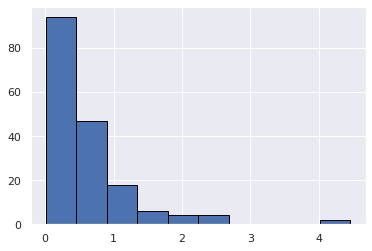

In [ ]:
plt.hist(df['O/C oil'], edgecolor='black')

#Mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.        , 0.1107022 , 0.01483199, 0.15969038, 0.05907519,
       0.        , 0.01179285, 0.07291773, 0.0881414 ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

TOT_ZONE             0.123959
RATIO                0.088141
FREE_PSA             0.072918
VOLUME_PROSTATICO    0.034384
psa_density          0.011793
train_nd             0.010833
PSA                  0.000000
ap_sx                0.000000
dtype: float64

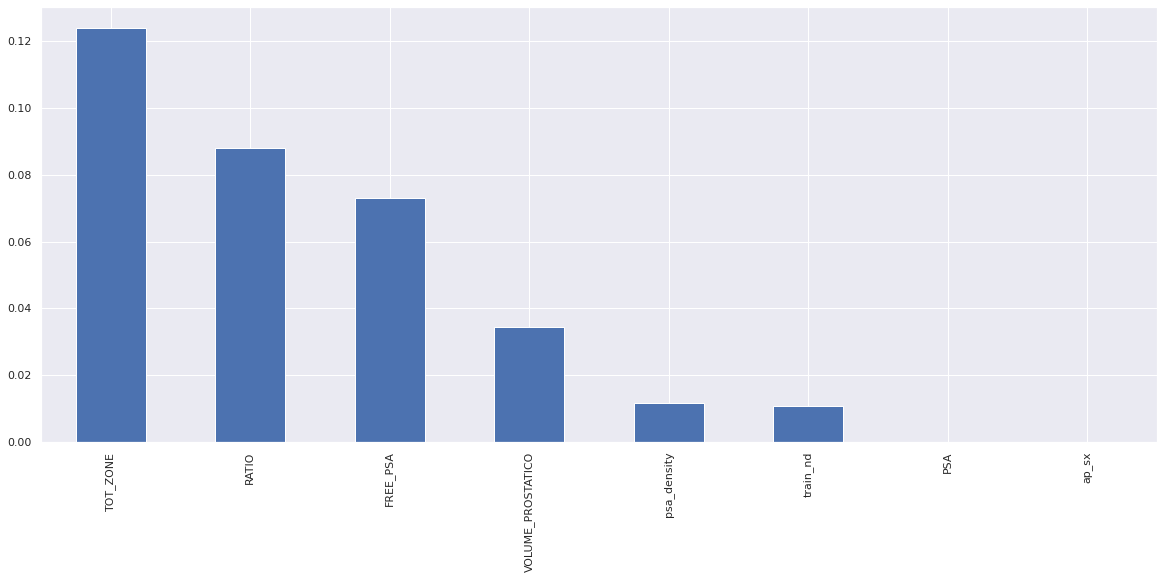

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=2)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['TOT_ZONE', 'RATIO'], dtype='object')

#considerazioni

In [ ]:
#Count the number of empty values of each columns in dataset
df.isna().sum()

Material_1               0
Type_1                   4
Pretreatment_1           0
Moisture_1               0
Volatiles_1              0
Fixed Carbon_1           0
Ash_1                    0
HHV, MJ/Kg_1            92
C_1                      0
H_1                      0
N_1                      0
O_1                      0
S_1                      0
Cl_1                     0
H/C(0)_1                12
O/C(0)_1                12
Cellulose_1              0
Hemicellulose_1          0
Lignin_1                 0
Extractives_1            0
Particle Size, mm_1    141
O/C oil                  0
dtype: int64

Queste colonne sono molto dipendenti dalle altre ho infatti dei gradi di libertà

In [ ]:
df=df.drop(columns=["Cl_1","Extractives_1"])

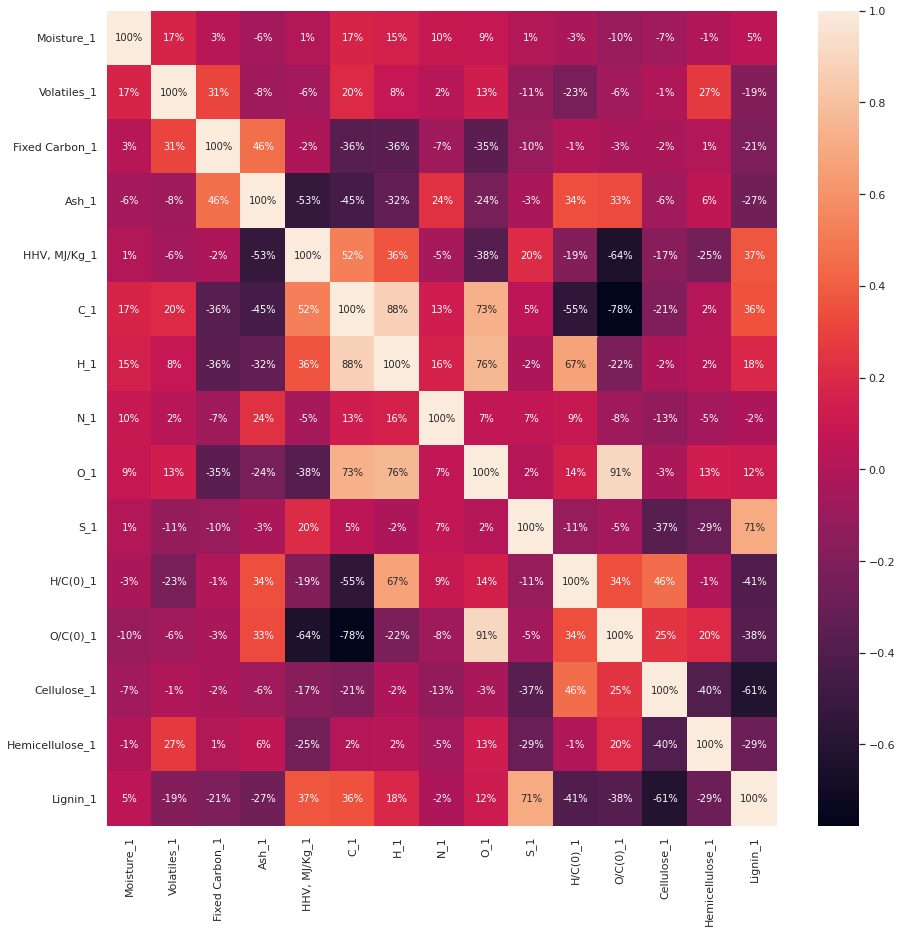

In [ ]:
#Visualize the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,1:df.shape[1]-1].corr(), annot=True, fmt='.0%')

#Correlazione

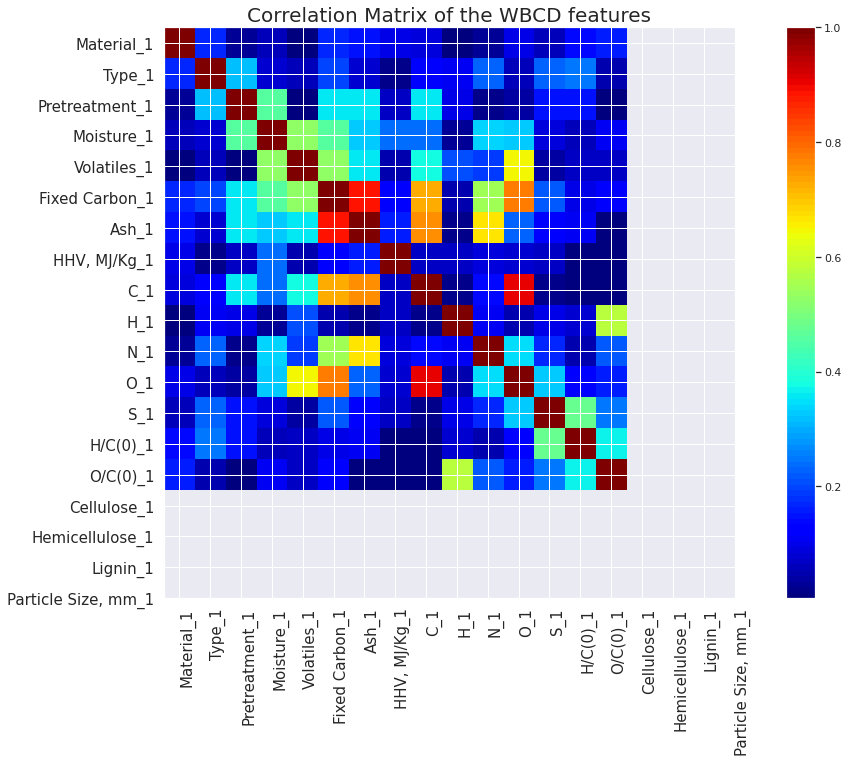

In [ ]:
# Bivariate Analysis
# Make a Features Correlation Matrix of the WBCD features
# Readapted from AN6U5

def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In [ ]:
# Dropping of features with a correlation greater than 0.8
# Code readapted from Chris Albon
# Create the correlation matrix with absolute values
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

In [ ]:
to_drop

['H_1', 'O_1', 'H/C(0)_1', 'O/C(0)_1']

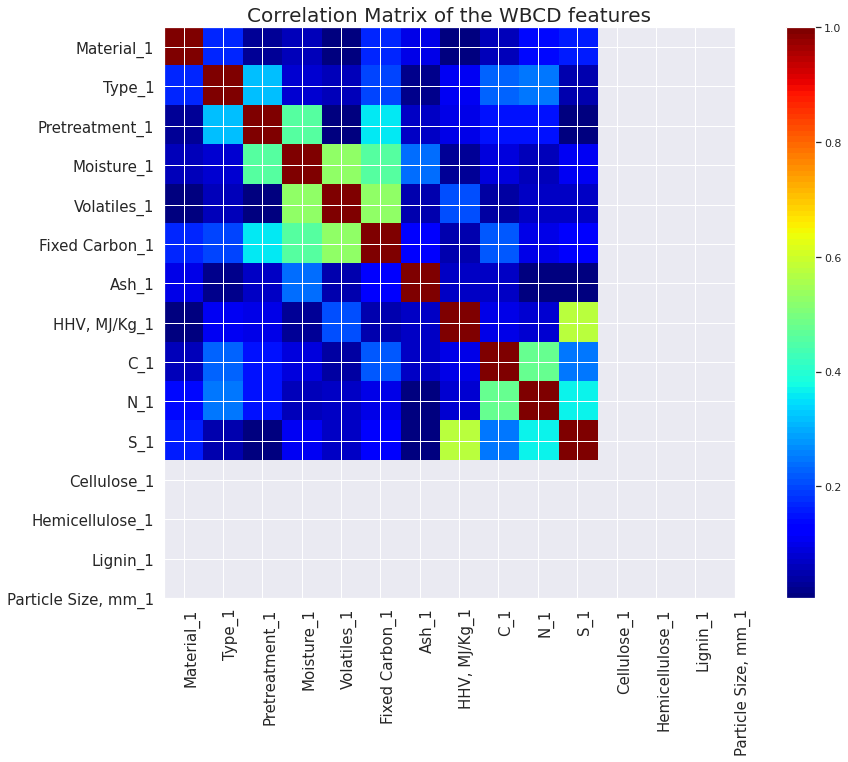

In [ ]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

In [ ]:
# Print a table with all the features correlations
# Redundant features were dropped from the original 30 features dataset
# To get the correlation, we apply the .corr() method
# followed by the .abs() method to the df_features_corr_dropped DataFrame
df_features_corr_dropped.corr().abs()

,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,N_1,S_1,Cellulose_1,Hemicellulose_1,Lignin_1
Moisture_1,1.000000,0.167236,0.028701,0.059476,0.005098,0.167093,0.095179,0.005315,0.060403,0.134643,0.154473
Volatiles_1,0.167236,1.000000,0.314950,0.080150,0.058077,0.199144,0.021683,0.114135,0.227620,0.251153,0.046053
Fixed Carbon_1,0.028701,0.314950,1.000000,0.457881,0.012040,0.360354,0.073147,0.100646,0.152281,0.149516,0.007115
Ash_1,0.059476,0.080150,0.457881,1.000000,0.531935,0.453117,0.235155,0.031746,0.091470,0.063701,0.111289
"HHV, MJ/Kg_1",0.005098,0.058077,0.012040,0.531935,1.000000,0.522914,0.048596,0.204220,0.043057,0.066245,0.071929
C_1,0.167093,0.199144,0.360354,0.453117,0.522914,1.000000,0.125578,0.046185,0.220528,0.095154,0.122571
N_1,0.095179,0.021683,0.073147,0.235155,0.048596,0.125578,1.000000,0.066554,0.071339,0.013819,0.005533
S_1,0.005315,0.114135,0.100646,0.031746,0.204220,0.046185,0.066554,1.000000,0.103158,0.075967,0.579110
Cellulose_1,0.060403,0.227620,0.152281,0.091470,0.043057,0.220528,0.071339,0.103158,1.000000,0.478316,0.247167
Hemicellulose_1,0.134643,0.251153,0.149516,0.063701,0.066245,0.095154,0.013819,0.075967,0.478316,1.000000,0.369988


In [ ]:
df=df.drop(columns=to_drop)

#Encoding

In [ ]:
categorical_cols=df.columns[df.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [ ]:
df["Material_1_cat"]=df["Material_1"].astype('category').cat.codes
df["Type_1_cat"]=df["Type_1"].astype('category').cat.codes
df["Pretreatment_1_cat"]=df["Pretreatment_1"].astype('category').cat.codes
df["Particle Size, mm_1_cat"]=df["Particle Size, mm_1"].astype('category').cat.codes
df.head()

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,N_1,S_1,Cellulose_1,Hemicellulose_1,Lignin_1,"Particle Size, mm_1",O/C oil,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"
0,japonica alga,algae,acid_washed,5.03,0.00,0.00,7.32,14.27,43.76,2.76,0.00,0.0,0.0,0.0,NaN,0.469887,22,1,0,-1
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,0.21,0.02,41.0,26.5,25.3,0.6,2.561132,5,0,2,11
2,japonica alga,algae,none,6.90,0.00,0.00,20.21,16.96,41.22,1.17,0.00,0.0,0.0,0.0,NaN,0.393652,22,1,2,-1
3,beech wood,hardwood,none,8.00,0.00,0.00,0.54,NaN,48.44,0.00,0.00,0.0,0.0,0.0,NaN,0.236315,6,5,2,-1
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,4.43,0.53,0.0,0.0,0.0,0.6 mm <particle diameter < 1.18 mm,1.952824,40,0,2,12


In [ ]:
df.columns

Index(['Material_1', 'Type_1', 'Pretreatment_1', 'Moisture_1', 'Volatiles_1',
       'Fixed Carbon_1', 'Ash_1', 'HHV, MJ/Kg_1', 'C_1', 'N_1', 'S_1',
       'Cellulose_1', 'Hemicellulose_1', 'Lignin_1', 'Particle Size, mm_1',
       'O/C oil', 'Material_1_cat', 'Type_1_cat', 'Pretreatment_1_cat',
       'Particle Size, mm_1_cat'],
      dtype='object')

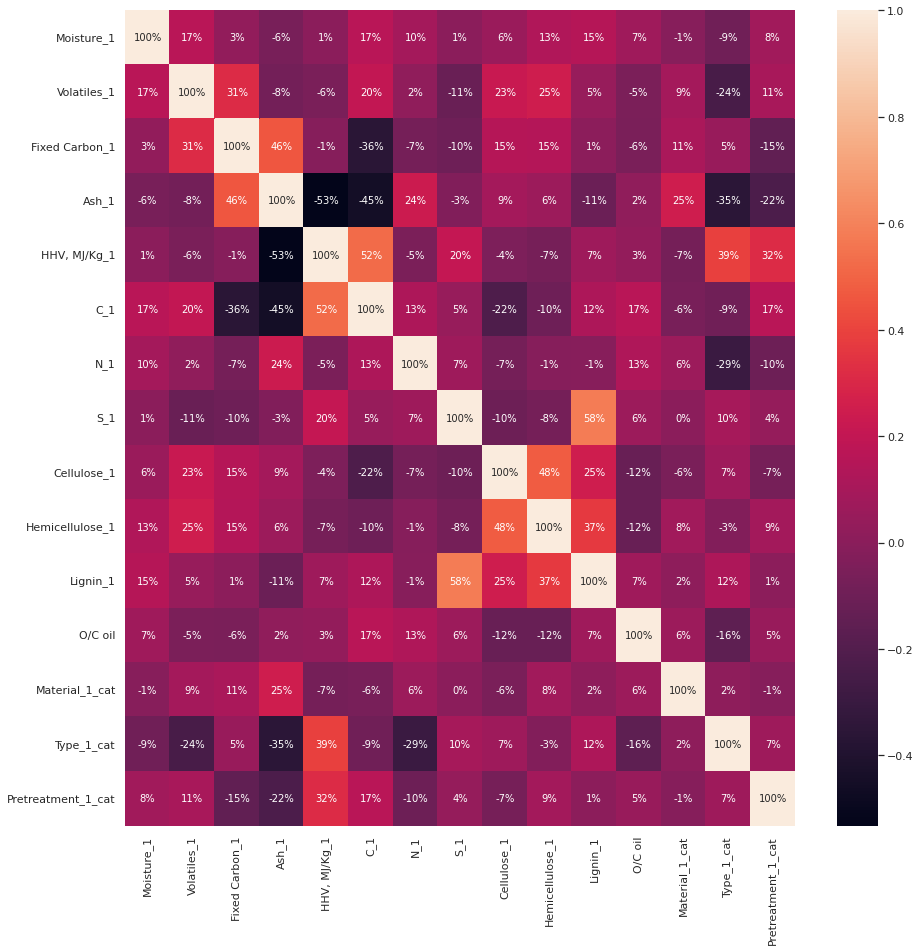

In [ ]:
#Visualize the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,1:df.shape[1]-1].corr(), annot=True, fmt='.0%')

#Split

In [ ]:
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1','Particle Size, mm_1'])
Y=df["O/C oil"]

In [ ]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

In [ ]:
df_X_train=X_train
df_Y_train=Y_train

Missing value

In [ ]:
import statistics
mediane={}
mediane_tot={}

for column in X_train.columns:
  mediana=X_train.groupby(column)[column].transform("median")
  X_train[column].fillna(mediana, inplace=True)
  #mediana=statistics.median(X_train[column])
  mediane.update({column: mediana})
  print(str(column) + ": " + str(statistics.median(X_train[column])))


Moisture_1: 6.495
Volatiles_1: 72.435
Fixed Carbon_1: 12.54
Ash_1: 2.325
HHV, MJ/Kg_1: nan
C_1: 46.739999999999995
N_1: 0.36
S_1: 0.0
Cellulose_1: 0.0
Hemicellulose_1: 0.0
Lignin_1: 0.0
Material_1_cat: 31.5
Type_1_cat: 5.0
Pretreatment_1_cat: 2.0
Particle Size, mm_1_cat: -1.0


In [ ]:
for column in X_train.columns[3:-1]:
  
  X_train[column]=X_train[column].fillna(mediane[column])
  X_validation[column]=X_validation[column].fillna(mediane[column])
  X_test[column]=X_test[column].fillna(mediane[column])

X_train=X_train.fillna(-1)
X_validation=X_validation.fillna(-1)
X_test=X_test.fillna(-1)

In [ ]:
#NaN Values
df1 = X_train[X_train.isna().any(axis=1)]

df1

,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,N_1,S_1,Cellulose_1,Hemicellulose_1,Lignin_1,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"


Normalizzazione

In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation=sc.transform(X_validation)
X_test = sc.transform(X_test)

In [ ]:
X_train = np.array(X_train)
X_validation=np.array(X_validation)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_validation=np.array(Y_validation)
Y_test = np.array(Y_test)

#Decision Tree

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
dtr_model = DecisionTreeRegressor(random_state=42)
dtr_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

Validation

In [ ]:
# test the output by changing values, like 3750
y_pred = dtr_model.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.0961828  0.4        0.27397034 0.49187033 2.09310345 0.4977384
 1.2087424  0.27355526 1.17323739 2.09310345 0.46988749 0.582
 0.30504009 1.17323739 0.67304189 0.05522685 0.04164612 0.05522685
 0.27397034 0.04164612 0.36174575 0.35637969 0.43321127 0.582
 0.05522685 0.27397034 0.59450172 0.49187033 0.07347424 0.36174575
 1.05803571 0.86956522 0.30738734]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = dtr_model.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred), dtr_model.get_depth())
#get_depth returns the depth of the tree

0.28878354261725436 14


Test

In [ ]:
# test the output by changing values, like 3750
y_pred_test = dtr_model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[1.42204301 0.09295583 0.49187033 0.23466886 0.34253982 0.23466886
 1.17323739 0.30096318 0.49187033 0.66997027 0.23789212 0.23652955
 1.02649007 0.46988749 0.27397034 0.51910499 1.42204301 0.7358741
 0.26351351 0.61904762 0.04164612 0.05522685 0.14014094 1.42204301
 0.04164612 0.36174575 0.50465803 0.05522685 0.30504009 0.0961828
 0.26351351 0.4977384  0.0961828  0.61904762 0.61904762 1.11697248
 2.09310345 0.2809976  0.7358741  0.50465803 0.7358741  0.91022965
 0.41637352 0.59450172]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_test = dtr_model.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test), dtr_model.get_depth())
#get_depth returns the depth of the tree

0.26657193024619436 14


In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dtr_model, out_file ='tree.dot',
               feature_names = X.columns) 

#Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=200, random_state=40)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=40)

Validation

In [ ]:
# test the output by changing values, like 3750
y_pred = rf.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.13987339 0.61589843 0.30139045 0.47681808 1.5284772  0.48759783
 1.11280301 0.29460735 1.1277625  1.5284772  0.48740445 0.30725398
 0.28278322 1.1277625  0.77829318 0.44900059 0.20985583 0.31512991
 0.29926469 0.18911664 0.58819575 0.58966201 0.5023458  0.30559496
 0.51428481 0.28003052 0.59084873 0.47681808 0.21948349 0.58819575
 0.82575391 0.82818809 0.52155409]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = dtr_model.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))
#get_depth returns the depth of the tree

0.28878354261725436


Test

In [ ]:
# test the output by changing values, like 3750
y_pred_test = rf.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.7974268  0.25495727 0.47681808 0.91704821 0.3651321  0.91704821
 1.1277625  0.27138542 0.4771323  0.59508828 0.27261962 0.32962982
 0.70600312 0.48740445 0.22174572 0.60798019 1.11458361 0.60666224
 0.30927392 0.99224868 0.20985583 0.33367947 0.82139225 0.59635975
 0.10323457 0.69457056 0.57832012 0.29414862 0.28278322 0.26262491
 0.29611478 0.48759783 0.33529009 0.99224868 0.99224868 1.0568217
 1.5284772  0.31637564 0.62302498 1.0456766  0.63468775 0.70257762
 0.41493608 0.59084873]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_test = rf.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test))
#get_depth returns the depth of the tree

0.21532039547838758


#SVM Regressor

In [ ]:
#SVM
from sklearn.svm import SVR
svr = SVR(kernel="rbf")
svr.fit(X_train, Y_train)

SVR()

Validation

In [ ]:
# test the output by changing values, like 3750
y_pred = svr.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.19646763 0.50015132 0.58928243 0.44383013 0.79810237 0.53940525
 1.10837817 0.37379985 1.08212239 0.79810237 0.56970993 0.53538607
 0.19731806 1.07397839 0.48706372 0.69767989 0.12520917 0.41959784
 0.47738776 0.12721222 0.46160459 0.60797621 0.53305972 0.42831227
 0.64736193 0.26808211 0.53685659 0.44383013 0.16892411 0.46160459
 0.43471793 0.55203657 0.21541694]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = svr.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))
#get_depth returns the depth of the tree

0.3116851086941533


Test

In [ ]:
# test the output by changing values, like 3750
y_pred_test = svr.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.81375364 0.25956381 0.44383013 0.56071492 0.42905014 0.56071492
 1.07397839 0.18215867 0.33704007 0.70054142 0.34351708 0.34184372
 0.45445721 0.56970993 0.48509361 0.6192476  0.81837406 0.56105743
 0.36264405 0.55260834 0.12520917 0.58741978 0.43306501 0.61956898
 0.16528136 0.81064329 0.66800041 0.25748846 0.19731806 0.1889554
 0.36366431 0.53940525 0.2530789  0.55260834 0.55260834 0.9108891
 0.79810237 0.3647887  0.63837104 0.62868928 0.64449281 0.81028321
 0.52744362 0.53685659]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_test = svr.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test))
#get_depth returns the depth of the tree

0.2455080067048646


#Gradient Regressor

In [ ]:
#Gradient Regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='auto', random_state=22)  
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1855: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,


GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='auto', random_state=22)

Validation

In [ ]:
# test the output by changing values, like 3750
y_pred = model.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.09515733 0.40606751 0.30458903 0.49228855 2.01192093 0.4506327
 1.20926927 0.27130323 1.02061744 2.01192093 0.47387216 0.32997499
 0.09715604 1.02061744 0.49757752 0.29531689 0.16297981 0.1184852
 0.3713191  0.16297981 0.36987635 0.58407176 0.44872311 0.37663728
 0.37031362 0.26333792 0.5969178  0.49228855 0.08865938 0.36987635
 0.55698995 1.18014573 0.51867229]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))
#get_depth returns the depth of the tree

0.26584035838267217


Test

In [ ]:
# test the output by changing values, like 3750
y_pred_test = model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.71041149 0.39820457 0.49228855 1.12157353 0.27600449 1.12157353
 1.02061744 0.2611983  0.53081083 0.71643945 0.23897397 0.44645676
 0.84680499 0.47387216 0.13859102 0.52331773 1.10841778 0.50934707
 0.26674807 0.62096994 0.16297981 0.13579343 0.650749   0.48157363
 0.06044106 0.73002321 0.51971849 0.16760944 0.09715604 0.23440122
 0.26674807 0.4506327  0.12626393 0.62096994 0.62096994 0.81993112
 2.01192093 0.34949182 0.73457631 1.02859422 0.72350524 0.90877826
 0.40498132 0.5969178 ]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_test = model.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test))
#get_depth returns the depth of the tree

0.19750962569506403


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[ 0.43232661  1.5820929   0.48118842  0.26629201  0.61314526  0.59868888
  0.51649193  0.1034477   0.72154194  0.61314526  0.74170775  0.27106117
  0.609274    0.71425318  0.35877817  0.93943311  0.76684791  0.62062983
  0.50128243  0.57659785  1.06630618  0.36060831  0.69708064  0.29115519
  1.03092571  0.71460839  0.66777128  0.26629201  0.39637304  1.06630618
 -0.34192996  0.68652399  0.30786418]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))


0.4550288924218565


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_test)
print(mean_absolute_error(Y_test, y_pred))

0.418609770200303


#ExtraTreesRegressor

In [ ]:
#criterion{“squared_error”, “absolute_error”}, default=”squared_error”
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=200,random_state=0)
regressor.fit(X_train,Y_train)

ExtraTreesRegressor(n_estimators=200, random_state=0)

In [ ]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.0961828  0.4        0.43367342 0.49187033 2.09310345 0.4977384
 1.2087424  0.27355526 1.16735247 2.09310345 0.46988749 0.50921254
 0.30504009 1.17323739 0.86225778 0.48589021 0.17366069 0.37509439
 0.39907869 0.16410356 0.36174575 0.6175199  0.43321127 0.50085713
 0.49900453 0.25736724 0.59450172 0.49187033 0.1154566  0.36174575
 0.51874428 0.89826388 0.40892754]


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))


0.24561670200060165


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_test)
print(mean_absolute_error(Y_test, y_pred))

0.1845140443247901


#Models

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR(),
    SVR(kernel="poly"),
    SVR(kernel="rbf")
]

In [ ]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_validation)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_validation, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_validation, y_pred))
    print("\tR2 score:", r2_score(Y_validation, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.001s
	Prediction time: 0.002s
	Explained variance: 0.34304226375522107
	Mean absolute error: 0.3033176163132967
	R2 score: 0.31810270800836327

GradientBoostingRegressor()
	Training time: 0.054s
	Prediction time: 0.000s
	Explained variance: 0.5833403545764487
	Mean absolute error: 0.26110575043356826
	R2 score: 0.5819961267444036

ExtraTreesRegressor()
	Training time: 0.119s
	Prediction time: 0.012s
	Explained variance: 0.6242438564558729
	Mean absolute error: 0.2470107361386552
	R2 score: 0.6239946260610614

RandomForestRegressor()
	Training time: 0.184s
	Prediction time: 0.009s
	Explained variance: 0.5705265099283385
	Mean absolute error: 0.2579923929931132
	R2 score: 0.5690128044035928

DecisionTreeRegressor()
	Training time: 0.004s
	Prediction time: 0.000s
	Explained variance: 0.34052193797461616
	Mean absolute error: 0.28068703602919365
	R2 score: 0.3333890180519795

LinearRegression()
	Training time: 0.001s
	Prediction time: 0.000s
	Explain

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = { 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [ ]:
tree_param = {'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
df_1=pd.DataFrame(X_train)
df_2=pd.DataFrame(X_validation)

X_n=df_1.append(df_2, ignore_index=True)

df_1=pd.DataFrame(Y_train)
df_2=pd.DataFrame(Y_validation)

Y_n=df_1.append(df_2, ignore_index=True)

#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_n = sc.fit_transform(X_n)

X_n=np.array(X_n)
Y_n=np.array(Y_n)

X_n_test=X_test
Y_n_test=Y_test



In [ ]:
grid = GridSearchCV(DecisionTreeRegressor(), tree_param)
model = grid.fit(X_n,Y_n)

In [ ]:
grid = GridSearchCV(GradientBoostingRegressor(), parameters)
model = grid.fit(X_n,Y_n)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

In [ ]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'absolute_error', 'learning_rate': 0.25, 'loss': 'squared_error', 'max_features': 'auto'} 

GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='auto') 



In [ ]:
#{'criterion': 'absolute_error', 'learning_rate': 0.25, 'loss': 'squared_error', 'max_features': 'auto'} 

model=GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='auto') 


In [ ]:
#{'criterion': 'mae', 'learning_rate': 0.05, 'loss': 'huber', 'max_features': 'auto'} 

model=DecisionTreeRegressor(max_depth=6)

In [ ]:
model.fit(X_n, Y_n)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1855: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='auto')

In [ ]:
y_pred=model.predict(X_n_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


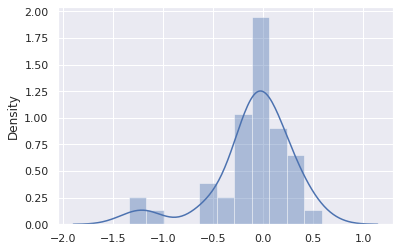

In [ ]:
sns.distplot(y_pred-Y_n_test)

In [ ]:
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_1.shape

(144, 16)

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_n_test)
print(mean_absolute_error(Y_n_test, y_pred))

0.26341540138456654


#Soluzione Finale

In [ ]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Test.xlsx", 'rb') as fp:
    df_test = pd.read_excel(fp)

df_test

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
0,acacia wood,hardwood,none,9.75,68.98,19.96,1.31,17.67,44.03,5.67,0.25,50.05,NaN,NaN,0.128776,1.136725,NaN,NaN,NaN,NaN,"0,5÷ 1",0
1,poplar,hardwood,none,4.30,NaN,NaN,0.70,18.80,46.70,6.20,0.20,46.50,NaN,NaN,0.132762,0.995717,NaN,NaN,25.3,5.2,0.3,0
2,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0
3,rice husks,agricultural_waste,none,7.90,59.50,15.50,17.10,NaN,44.60,5.60,NaN,49.30,NaN,NaN,0.125561,1.105381,34.4,29.3,19.2,NaN,NaN,0
4,eucalyptus wood,hardwood,none,NaN,84.09,15.46,0.44,NaN,49.58,5.63,0.11,44.68,NaN,NaN,0.113554,0.901170,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,poplar,hardwood,none,NaN,NaN,NaN,NaN,NaN,43.10,5.40,NaN,51.50,NaN,NaN,0.125290,1.194896,NaN,NaN,NaN,NaN,NaN,0
86,beech wood,hardwood,none,10.42,85.89,13.15,0.96,NaN,53.04,5.42,0.00,41.63,NaN,NaN,0.102187,0.784879,43.3,31.8,24.4,NaN,NaN,0
87,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,NaN,NaN,0.117263,0.953263,NaN,NaN,NaN,NaN,NaN,0
88,napier grass,grass,none,NaN,81.51,16.75,1.75,18.11,48.61,6.01,0.99,44.07,0.32,NaN,0.123637,0.906604,NaN,NaN,NaN,NaN,2,0


In [ ]:
df_test=df_test.drop(columns=["O/C oil"], axis=1)           

In [ ]:
for i in df_test.index:
  if df_test['Material_1'][i]=='cellulose':
    df_test['Type_1'][i]='pure'
    df_test['Cellulose_1'][i]=100.0
    df_test['Hemicellulose_1'][i]=0.0
    df_test['Lignin_1'][i]=0.0
    df_test['Extractives_1'][i]=0.0

  elif df_test['Material_1'][i]=='lignin':
    df_test['Type_1'][i]='pure'
    df_test['Cellulose_1'][i]=0.0
    df_test['Hemicellulose_1'][i]=0.0
    df_test['Lignin_1'][i]=100.0
    df_test['Extractives_1'][i]=0.0

  elif df_test['Material_1'][i]=='lignin':
    df_test['Type_1'][i]='pure'
    df_test['Cellulose_1'][i]=0.0
    df_test['Hemicellulose_1'][i]=0.0
    df_test['Lignin_1'][i]=100.0
    df_test['Extractives_1'][i]=0.0

  elif df_test['Material_1'][i]=='xylan':
    df_test['Type_1'][i]='pure'
    df_test['Cellulose_1'][i]=0.0
    df_test['Hemicellulose_1'][i]=100.0
    df_test['Lignin_1'][i]=0.0
    df_test['Extractives_1'][i]=0.0

In [ ]:
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
for i in df_test.index:
  if np.isnan(df_test['Moisture_1'][i]) and df_test['Volatiles_1'][i]!='nan' and df_test['Fixed Carbon_1'][i]!='nan' and df_test['Ash_1'][i]!='nan':
    df_test['Moisture_1'][i]=100-(df_test['Volatiles_1'][i]+df_test['Fixed Carbon_1'][i]+df_test['Ash_1'][i])
 
  elif np.isnan(df_test['Volatiles_1'][i]) and  df_test['Fixed Carbon_1'][i]!='nan' and df_test['Ash_1'][i]!='nan' and df_test['Moisture_1'][i]!='nan':
    df_test['Volatiles_1'][i]=100-(df_test['Moisture_1'][i]+df_test['Fixed Carbon_1'][i]+df_test['Ash_1'][i])
  
  elif np.isnan(df_test['Fixed Carbon_1'][i]) and  df_test['Volatiles_1'][i]!='nan' and df_test['Ash_1'][i]!='nan'and df_test['Moisture_1'][i]!='nan':
    df_test['Fixed Carbon_1'][i]=100-(df_test['Moisture_1'][i]+df['Volatiles_1'][i]+df_test['Ash_1'][i])
  
  elif np.isnan(df_test['Ash_1'][i]) and  df_test['Fixed Carbon_1'][i]!='nan' and df_test['Volatiles_1'][i]!='nan'and df_test['Moisture_1'][i]!='nan':
    df_test['Ash_1'][i]=100-(df_test['Moisture_1'][i]+df_test['Fixed Carbon_1'][i]+df_test['Volatiles_1'][i])

In [ ]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
for i in df_test.index:
  if np.isnan(df_test['C_1'][i]) and df_test['H_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['C_1'][i]=100-(df_test['H_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
 
  elif np.isnan(df_test['H_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['H_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['N_1'][i]) and df_test['C_1'][i]!='nan' and df_test['H_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['N_1'][i]=100-(df_test['C_1'][i]+df_test['H_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['O_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['H_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['O_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['H_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['S_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['H_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['S_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['H_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['Cl_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['H_1'][i]!='nan':
    df_test['Cl_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['H_1'][i])



In [ ]:
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1
for i in df_test.index:
  if np.isnan(df_test['Cellulose_1'][i]) and df_test['Hemicellulose_1'][i]!='nan' and df_test['Lignin_1'][i]!='nan' and df_test['Extractives_1'][i]!='nan':
    df_test['Cellulose_1'][i]=100-(df_test['Hemicellulose_1'][i]+df_test['Lignin_1'][i]+df_test['Extractives_1'][i])
 
  elif np.isnan(df_test['Hemicellulose_1'][i]) and df_test['Lignin_1'][i]!='nan' and df_test['Extractives_1'][i]!='nan' and df_test['Cellulose_1'][i]!='nan':
    df_test['Hemicellulose_1'][i]=100-(df_test['Lignin_1'][i]+df_test['Extractives_1'][i]+df_test['Cellulose_1'][i])
  
  elif np.isnan(df_test['Lignin_1'][i]) and df_test['Extractives_1'][i]!='nan' and df_test['Cellulose_1'][i]!='nan' and df_test['Hemicellulose_1'][i]!='nan':
    df_test['Lignin_1'][i]=100-(df_test['Extractives_1'][i]+df_test['Cellulose_1'][i]+df_test['Hemicellulose_1'][i])
  
  elif np.isnan(df_test['Extractives_1'][i]) and df_test['Cellulose_1'][i]!='nan' and df_test['Hemicellulose_1'][i]!='nan' and df_test['Lignin_1'][i]!='nan':
    df_test['Extractives_1'][i]=100-(df_test['Cellulose_1'][i]+df_test['Hemicellulose_1'][i]+df_test['Lignin_1'][i])

In [ ]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1

colonne=["C_1",	"H_1",	"N_1",	"O_1",	"S_1",	"Cl_1", "Moisture_1",	"Volatiles_1",	"Fixed Carbon_1",	"Ash_1", 
         "Cellulose_1",	"Hemicellulose_1",	"Lignin_1",	"Extractives_1"]

for column in colonne:
  df_test[column] = df_test[column].fillna(0)

In [ ]:
df1 = df_test[df_test.isna().any(axis=1)]

df1

In [ ]:
categorical_cols=df_test.columns[df_test.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [ ]:
df_test["Material_1_cat"]=df_test["Material_1"].astype('category').cat.codes
df_test["Type_1_cat"]=df_test["Type_1"].astype('category').cat.codes
df_test["Pretreatment_1_cat"]=df_test["Pretreatment_1"].astype('category').cat.codes
df_test["Particle Size, mm_1_cat"]=df_test["Particle Size, mm_1"].astype('category').cat.codes

In [ ]:
df_test=df_test.drop(columns=['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])

In [ ]:
df_test=df_test.drop(columns=["Cl_1","Extractives_1"])
df_test=df_test.drop(columns=to_drop)

In [ ]:
for column in df_test.columns[:-5]:
  
  df_test[column]=df_test[column].fillna(mediane[column])

df_test=df_test.fillna(-1)


#Decision Tree

In [ ]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [ ]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
dtr_model = DecisionTreeRegressor(random_state=50, max_depth=8)
dtr_model.fit(X, Y)

DecisionTreeRegressor(max_depth=8, random_state=50)

In [ ]:
# test the output by changing values, like 3750
y_pred = dtr_model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.90725806 1.19485592 0.45518083 0.50155914 1.09717481 0.08497703
 2.56126482 1.36830146 0.87381197 0.77461812 0.50155914 0.8811328
 0.67036689 0.67036689 0.87381197 0.44013385 0.26546589 0.38587835
 0.26546589 0.44013385 0.04772499 0.26546589 0.87381197 0.07690144
 1.14689971 0.26546589 1.09717481 0.08497703 0.33117859 0.8811328
 0.26546589 0.38587835 0.38587835 0.38587835 0.45518083 0.44013385
 1.60169492 1.09717481 0.50155914 0.07690144 0.67036689 0.26546589
 0.07690144 2.56126482 0.38587835 1.2087424  0.8811328  0.09136164
 0.67036689 0.21819712 0.29444444 1.09717481 1.95282392 0.44013385
 0.08497703 0.67036689 0.44013385 1.36830146 1.60169492 0.67036689
 1.09717481 0.77729008 0.26546589 0.87381197 0.50155914 0.25337173
 1.09717481 0.38587835 0.87381197 1.09717481 0.50155914 0.44013385
 2.09310345 0.26546589 0.77729008 0.67036689 0.8811328  0.44013385
 1.19485592 1.09717481 0.87381197 0.44013385 0.50155914 0.50155914
 0.38587835 0.26546589 0.09136164 0.07690144 

#Random Forest

In [ ]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [ ]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [ ]:
#RF
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=200, random_state=12)
rf.fit(X, Y)

RandomForestRegressor(n_estimators=200, random_state=12)

In [ ]:
# test the output by changing values, like 3750
y_pred = rf.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.92128693 0.7925029  0.4414077  0.36164244 0.44568404 0.1378095
 1.24120552 1.25873449 0.82153402 0.71257237 0.25109863 0.70769056
 0.64192754 0.52779299 0.80527857 0.46724752 0.28207285 0.60783431
 0.28806866 0.59266892 0.16604631 0.33805091 0.78927054 0.47952441
 0.77352562 0.34438591 0.36870819 0.14118686 0.47895142 0.59531661
 0.33626553 0.56611172 0.47999866 0.47999866 0.33326162 0.53887453
 0.63248142 0.89308948 0.19571389 0.45801871 0.68163959 0.33209666
 0.47158176 1.02518433 0.56611172 0.91466292 0.6062762  0.53736817
 0.73762445 0.26928417 0.70703151 0.44568404 1.12596714 0.73738993
 0.1378095  0.64192754 0.59106824 1.25873449 0.57460353 0.68163959
 0.44568404 0.88404251 0.33626553 0.63965589 0.31503422 0.339375
 0.44568404 0.49985004 0.60465303 0.44568404 0.3311403  0.46724752
 1.57206163 0.16865295 0.86218186 0.68163959 0.54976486 0.60116087
 0.65688008 0.51141868 0.68823087 0.49342529 0.34544326 0.34142438
 0.50057516 0.22973916 0.4132038  0.3901598  0

#ExtraTreesRegressor

In [ ]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [ ]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [ ]:
#criterion{“squared_error”, “absolute_error”}, default=”squared_error”
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=200,random_state=0)
regressor.fit(X, Y)

ExtraTreesRegressor(n_estimators=200, random_state=0)

In [ ]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.68803168 1.22709359 0.44885045 0.37722    0.4369502  0.11565866
 0.99722989 1.18632324 0.6911181  1.22562795 0.37270323 0.64779197
 0.59581418 0.41839075 0.7315166  0.57664826 0.51982698 0.81629911
 0.28891878 0.54176257 0.05763982 0.37722    0.72950433 0.4369502
 0.73756318 0.37722    0.52939969 0.28923522 0.57561361 0.64779197
 0.22766082 0.81629911 0.3334344  0.3334344  0.44885045 0.54176257
 0.83891006 0.96211764 0.26607699 0.32968732 0.59190377 0.54176257
 0.35021037 0.74270491 0.81629911 1.36031527 0.64779197 0.71005178
 1.72975579 0.21593192 0.92264121 0.4369502  1.29078758 0.81142435
 0.11565866 0.68598589 0.57664826 1.18632324 0.37722    0.59190377
 0.4369502  1.02523959 0.22766082 0.55560995 0.28891878 0.44885045
 0.4369502  0.3334344  0.55560995 0.4369502  0.44885045 0.57664826
 1.84977325 0.29550248 0.85959749 0.59190377 0.64779197 0.47403632
 0.70437454 0.43606159 0.64814771 0.57664826 0.44885045 0.44885045
 0.3334344  0.54176257 0.38627586 0.19965248

#Output file

In [ ]:
id_list=[]

for i in range(1,91):
  id_list.append(i)

id=np.array(id_list)  #id

id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90])

In [ ]:
colonna_1=pd.DataFrame(id, columns=['ID'])

colonna_1

,ID
0,1
1,2
2,3
3,4
4,5
...,...
85,86
86,87
87,88
88,89


In [ ]:
colonna_2=pd.DataFrame(y_pred, columns=["O/C oil"])

colonna_2


,O/C oil
0,0.688032
1,1.227094
2,0.448850
3,0.377220
4,0.436950
...,...
85,0.541763
86,0.386276
87,0.199652
88,0.816299


In [ ]:
# concatenating along columns
horizontal_concat = pd.concat([colonna_1, colonna_2], axis=1)

In [ ]:
horizontal_concat

,ID,O/C oil
0,1,0.688032
1,2,1.227094
2,3,0.448850
3,4,0.377220
4,5,0.436950
...,...,...
85,86,0.541763
86,87,0.386276
87,88,0.199652
88,89,0.816299


In [ ]:
horizontal_concat.to_csv('Risultato_ExtraTreesRegressor_200.csv', index = False)